In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# 1. Проверка качества данных

In [ ]:
df = pd.read_csv('sp 500.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Date       453 non-null    object
 1   Open       453 non-null    object
 2   High       453 non-null    object
 3   Low        453 non-null    object
 4   Close      453 non-null    object
 5   Adj Close  453 non-null    object
 6   Volume     453 non-null    object
dtypes: object(7)
memory usage: 24.9+ KB


In [ ]:
#Меняем типы данных на нужные
df['Date'] = pd.to_datetime(df['Date'])
df["Open"] = df["Open"].str.replace(",","").astype(float)
df["High"] = df["High"].str.replace(",","").astype(float)
df["Low"] = df["Low"].str.replace(",","").astype(float)
df["Close"] = df["Close"].str.replace(",","").astype(float)
df["Adj Close"] = df["Adj Close"].str.replace(",","").astype(float)
df["Volume"] = df["Volume"].str.replace(",","").astype(float)

In [ ]:
df.info()
# видим, что пропусков нет

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453 entries, 0 to 452
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       453 non-null    datetime64[ns]
 1   Open       453 non-null    float64       
 2   High       453 non-null    float64       
 3   Low        453 non-null    float64       
 4   Close      453 non-null    float64       
 5   Adj Close  453 non-null    float64       
 6   Volume     453 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 24.9 KB


In [ ]:
duplicateRows = df[df.duplicated ()]
duplicateRows
# No duplicates :)

,Date,Open,High,Low,Close,Adj Close,Volume


In [ ]:
#Замечаем, что столбцы Close и Adj Close одинаковы, нет смысла хранить оба..
print( sum(abs(df["Close"] - df["Adj Close"])))
df.drop(columns = ["Adj Close"], inplace = True)


0.0


# 2. Расчет основных статистик

Можем заметить, что mean > median.( но не сильно).

Это значит, что в выборке преобладают относительно маленькие значения.


In [ ]:
df.describe()

,Date,Open,High,Low,Close,Volume
count,453,453.000000,453.000000,453.000000,453.000000,4.530000e+02
mean,2003-10-31 19:17:05.165562880,1318.239272,1363.202274,1271.566932,1325.109029,4.340568e+10
min,1985-01-01 00:00:00,167.200000,180.270000,163.360000,179.630000,1.860160e+09
25%,1994-06-01 00:00:00,462.690000,471.290000,454.360000,463.560000,6.152870e+09
50%,2003-11-01 00:00:00,1144.940000,1190.580000,1106.420000,1147.390000,2.998151e+10
75%,2013-04-01 00:00:00,1569.180000,1597.570000,1536.030000,1597.570000,7.584851e+10
max,2022-09-01 00:00:00,4778.140000,4818.620000,4560.000000,4766.180000,1.618436e+11
std,NaN,1000.221795,1035.104238,962.091777,1002.905691,3.769421e+10


In [ ]:
df.head(n=20)

,Date,Open,High,Low,Close,Volume
0,2022-09-01,3936.73,4119.28,3610.40,3640.47,8.866705e+10
1,2022-08-01,4112.38,4325.28,3954.53,3955.00,7.808852e+10
2,2022-07-01,3781.00,4140.15,3721.56,4130.29,6.802114e+10
3,2022-06-01,4149.78,4177.51,3636.87,3785.38,8.679906e+10
4,2022-05-01,4130.61,4307.66,3810.32,4132.15,8.912813e+10
5,2022-04-01,4540.32,4593.45,4124.28,4131.93,7.478485e+10
6,2022-03-01,4363.14,4637.30,4157.87,4530.41,1.009783e+11
7,2022-02-01,4519.57,4595.31,4114.65,4373.94,7.316779e+10
8,2022-01-01,4778.14,4818.62,4222.62,4515.55,7.327944e+10
9,2021-12-01,4602.82,4808.93,4495.12,4766.18,6.869983e+10


# 3. Построение графиков

При выборе графиков отталкивался от гипотезы:
> В зависимости от ***объема торгов*** или ***цены открытия/закрытия*** предыдущего дня можно сделать вывод о необходимости покупки/продажи фонда.


Т.к. целью было быстро сориентироваться насчет продажи/покупки фонда, решил, что было бы полезно видеть разницу в цене( возможный profit/loss ) за каждый месяц. Сделал отдельную колонку для этого  df["Close-Open"] .

Также подумал, что неплохо бы видеть зависимость цены закрытия(Close) от всего остального..

❓❓ К сожалению, пока я слаб в аналитике фондов( почему я тогда полез в эту тему? - интересно понять как это +- работает 😀 )

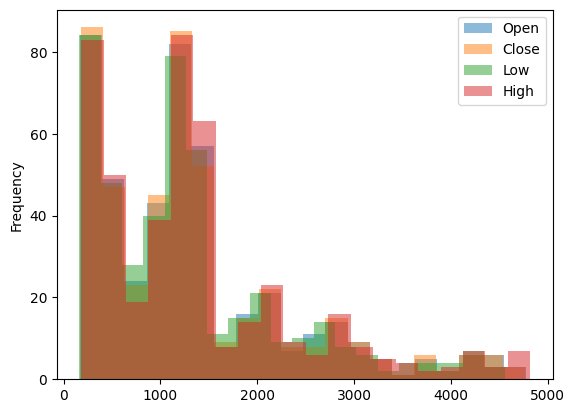

In [ ]:
df['Open'].plot(kind='hist',
                        alpha=0.5,
                        bins=20,
                        density=False)
df['Close'].plot(kind='hist',
                      alpha=0.5,
                      bins=20,
                      density=False)

df['Low'].plot(kind='hist',
                        alpha=0.5,
                        bins=20,
                        density=False)
df['High'].plot(kind='hist',
                      alpha=0.5,
                      bins=20,
                      density=False)


plt.legend(loc='upper right')
#plt.tight_layout()

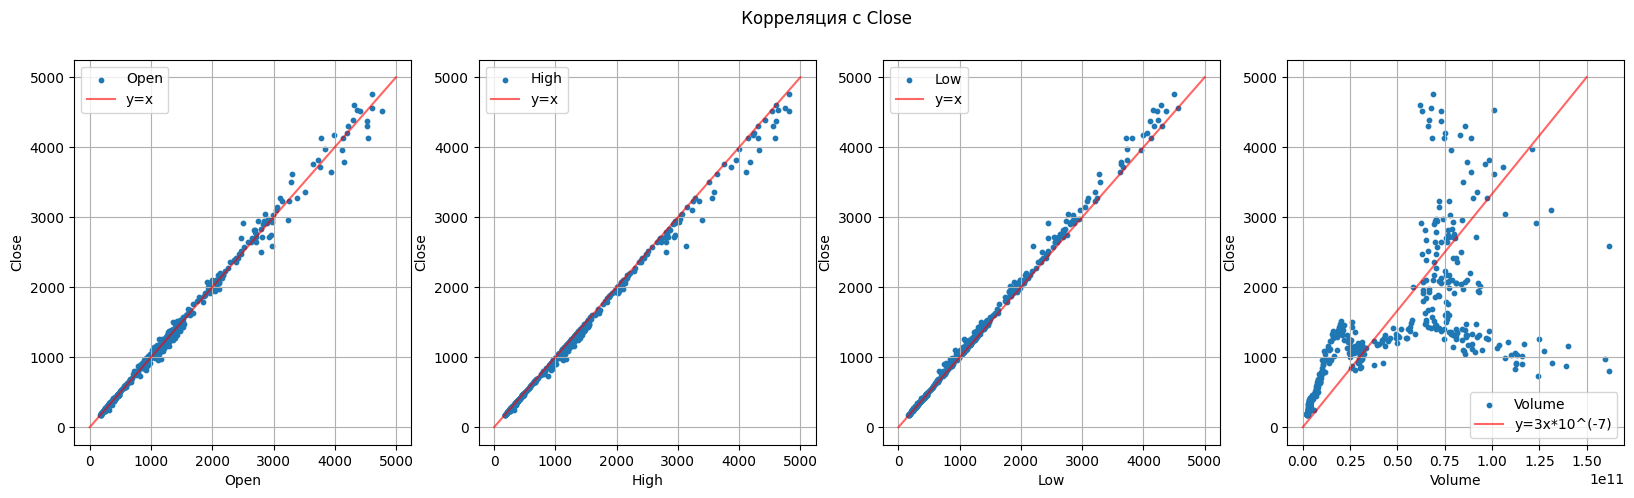

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(20, 5))
fig.suptitle(" Корреляция с Close")


ax[0].scatter(df["Open"], df["Close"], s = 10, label = 'Open')
ax[0].plot(np.linspace(0, 5000, 10), np.linspace(0, 5000, 10), c = 'r', label = 'y=x', alpha = 0.6)
ax[0].legend()
ax[0].set_ylabel("Close")
ax[0].set_xlabel("Open")
ax[0].grid()

ax[1].scatter(df["High"], df["Close"], s = 10, label = 'High')
ax[1].plot(np.linspace(0, 5000, 10), np.linspace(0, 5000, 10), c = 'r', label = 'y=x', alpha = 0.6)
ax[1].legend()
ax[1].set_ylabel("Close")
ax[1].set_xlabel("High")
ax[1].grid()

ax[2].scatter(df["Low"], df["Close"], s = 10, label = 'Low')
ax[2].plot(np.linspace(0, 5000, 10), np.linspace(0, 5000, 10), c = 'r', label = 'y=x', alpha = 0.6)
ax[2].legend()
ax[2].set_ylabel("Close")
ax[2].set_xlabel("Low")
ax[2].grid()

ax[3].scatter(df["Volume"], df["Close"], s = 10, label = 'Volume')
ax[3].plot(np.linspace(0, 5000*30000000, 10), np.linspace(0, 5000, 10), c = 'r', label = 'y=3x*10^(-7)', alpha = 0.6)
ax[3].legend()
ax[3].set_ylabel("Close")
ax[3].set_xlabel("Volume")
ax[3].grid()





Text(0.5, 0, 'Date')

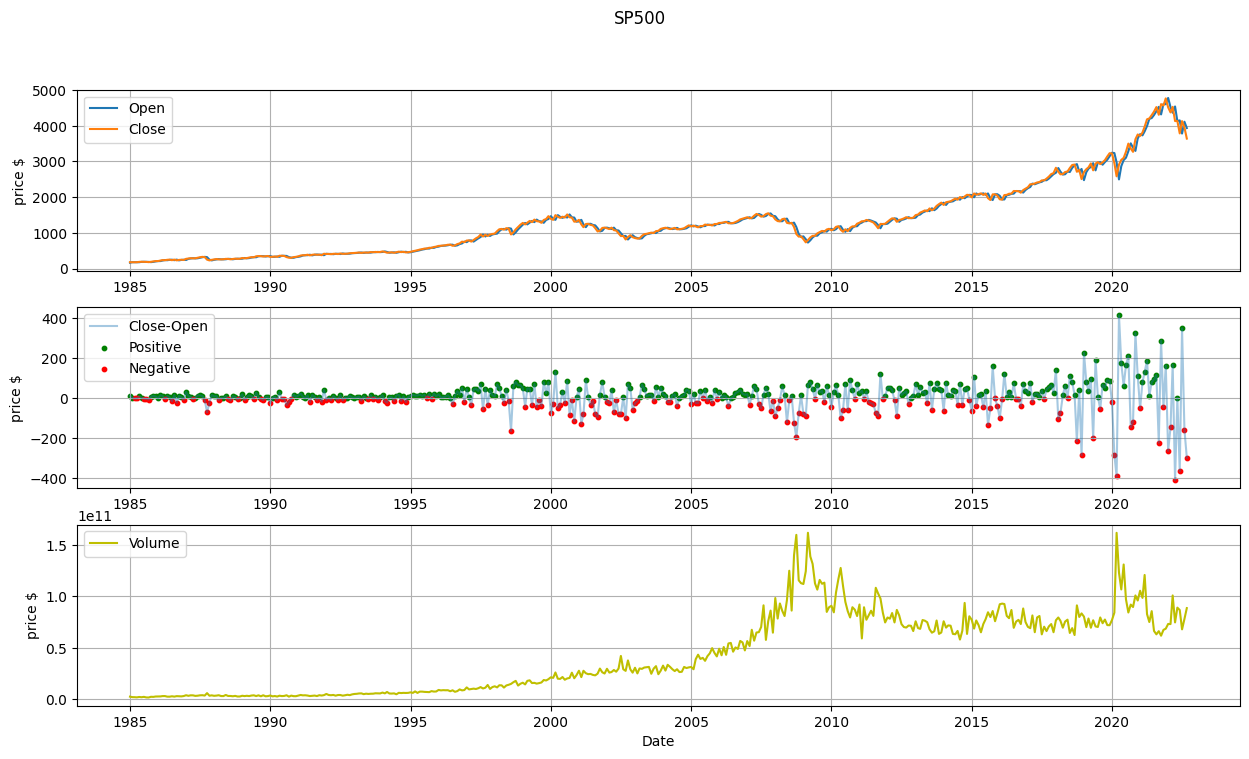

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(15, 8))
fig.suptitle("SP500")

ax[0].plot(df["Date"], df["Open"], label = "Open")
ax[0].plot(df["Date"], df["Close"], label = "Close")
ax[0].legend()
ax[0].grid()
ax[0].set_ylabel("price $")


df["Close-Open"] = df["Close"] - df["Open"]
ax[1].plot(df["Date"], df["Close-Open"], label = "Close-Open", alpha = 0.4)
Positive = df["Close-Open"].where(df["Close-Open"] > 0)
Negative = df["Close-Open"].where(df["Close-Open"] <= 0)
ax[1].scatter(df["Date"], Positive, label = "Positive", c = 'g', s = 10)
ax[1].scatter(df["Date"], Negative, label = "Negative", c = 'r', s = 10)
ax[1].legend()
ax[1].grid()
ax[1].set_ylabel("price $")

ax[2].plot(df["Date"], df["Volume"], label = "Volume", c = 'y')
ax[2].legend(loc = 'upper left')
ax[2].grid()
ax[2].set_ylabel("price $")

plt.xlabel("Date")

# 4. HeatMap

Построив heatmap, легко заметить наличие зависимости между Volume и Open/Close/High/Low. И линейную связь между Open, Close, High и Low

<Axes: >

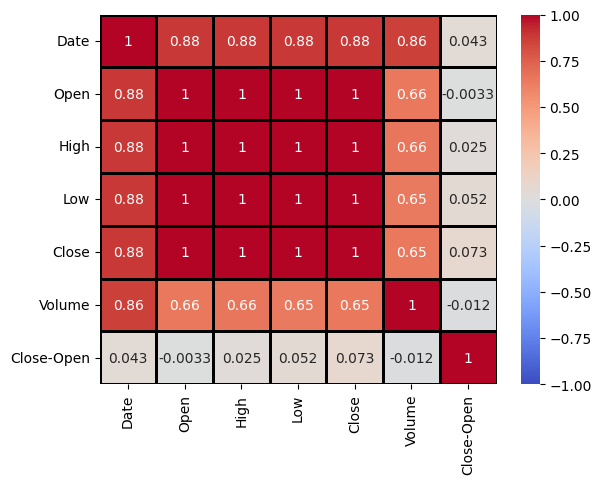

In [ ]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=1, linecolor='black')


# 5. ❓❓Вывод

Датасет хороший, только не совсем понятно что с ним делать)

По идее не стоит покупать, когда большой обьем продаж( ему соответствует падение в цене, если сопоставить 1ый и 3ий горизонтальные графики)

Подскажите, пожалуйста, какие ещё можно тут сделать выводы?